<a href="https://colab.research.google.com/github/QuaziSamiha/Digital_Image_Processing/blob/main/1703155_DIP_Lab_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow as imshow

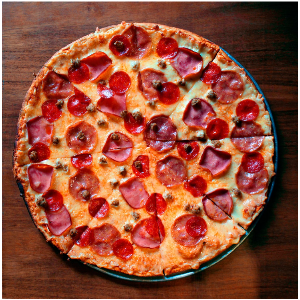

In [ ]:
img1 = cv2.imread('/content/drive/MyDrive/DIP lab/Lab_1/pizza.png')
img1 = cv2.resize(img1, (300,300))
imshow(img1)

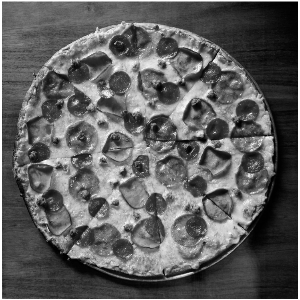

In [ ]:
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
imshow(gray)

In [ ]:
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

(0.0, 256.0)

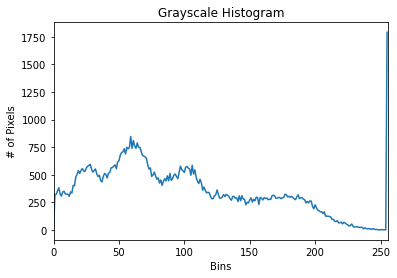

In [ ]:
# plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

95.35861111111112


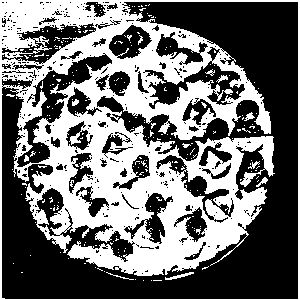

In [ ]:
mean = np.mean(gray)
print(mean)
img2=gray.copy()
h,w=img2.shape
for i in range(h):
  for j in range(w):
    if (img2[i][j]>mean):
      img2[i][j]=255
    else:
      img2[i][j]=0
imshow(img2)

In [ ]:
array1 = gray.flatten()  #convert to 1D array
even = []
odd = []
for i in range(len(array1)):
  if(i%2 == 0):
    even.append(array1[i])
  else:
    odd.append(array1[i])